In [1]:
# Preamble
from astropy.table import Table, column
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../astro_codes/')

In [2]:
gz2_data = Table.read('../fits/full_sample_debiased_w_low_z_mod.fits')

In [8]:
ml_table_matched = Table.read('fits/ml_table_matched.fits')
mendel_matched = Table.read('fits/mendel_matched.fits')
all_masses = Table.read('../fits/SF_fits/masses.fits')

In [7]:
sample_ok = ml_table_matched['vmax_ok']

6222


offset=0.12846552141560696,MAD=0.13082472039870652
offset=0.07469071967745577,MAD=0.09864052625275477


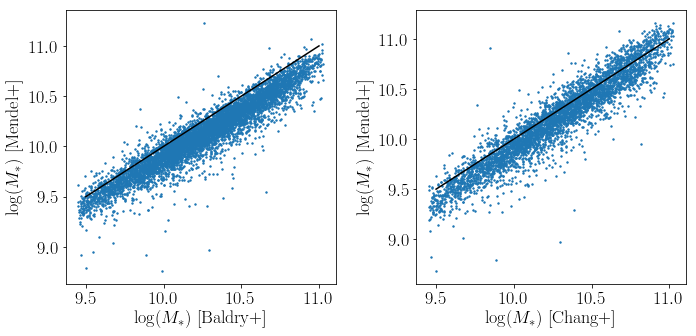

In [18]:
fig, axarr = plt.subplots(1,2,figsize=(10,5))

def plotter_panel(ax,x,y):
    _ = ax.scatter(x,y,s=2)
    offset = np.median(x-y)
    mad = np.median(np.abs(x-y))
    print('offset={},MAD={}'.format(offset,mad))
    _ = ax.plot([9.5,11],[9.5,11],'k-')
    return None
    

ax = axarr[0]
mass_ok = np.all([sample_ok,all_masses['baldry']>8],axis=0)
x = mendel_matched['bulge+disc'][mass_ok]
y = all_masses['baldry'][mass_ok]
_ = plotter_panel(ax,x,y)
_ = ax.set_xlabel('$\log(M_*)$ [Baldry+]')
_ = ax.set_ylabel('$\log(M_*)$ [Mendel+]')

ax = axarr[1]
mass_ok = np.all([sample_ok,all_masses['c15']>8],axis=0)
x = mendel_matched['bulge+disc'][mass_ok]
y = all_masses['c15'][mass_ok]
_ = plotter_panel(ax,x,y)
_ = ax.set_xlabel('$\log(M_*)$ [Chang+]')
_ = ax.set_ylabel('$\log(M_*)$ [Mendel+]')

fig.tight_layout()